In [1]:
import json
import matplotlib.pyplot as plt
import statistics as stat
import numpy as np
import math

In [2]:
with open('../../output/weights/model_5/log.json', 'r') as f:
    data = json.load(f)

l = len(data["loss"])
print(f"{l} records")
print(data.keys())

64807 records
dict_keys(['loss', 'mean_q', 'episode_reward', 'nb_episode_steps', 'nb_steps', 'episode', 'duration'])


In [3]:
# Loss
loss = [ v for v in data["loss"] if str(v) != "nan" ][-50_000:]
mean_loss = stat.mean(loss)
loss_filtered = { k: v for k, v in enumerate(loss) }#if v <= mean_loss }

# Mean Q
mean_q = [ v for v in data["mean_q"] if str(v) != "nan" ]#[-50_000:]
mean_mean_q = stat.mean(mean_q)
mean_q_filtered = { k: v for k, v in enumerate(mean_q) }# if v <= mean_mean_q }

# Reward
reward = [ v for v in data["episode_reward"] if str(v) != "nan" ]#[-500:]
mean_reward = stat.mean(reward)
episode_reward = { k: v for k, v in enumerate(reward) }# if v <= mean_reward }

# Duration
duration = { k: v for k, v in enumerate(data["duration"]) if str(v) != "nan" }

# NB Episode steps
nb_episode_steps = { k: v for k, v in enumerate(data["nb_episode_steps"]) if str(v) != "nan" }

In [4]:
def plot(data, title, labelX, labelY):
    interval = 1000
    index_0 = list(data.keys())[0]
    moving_average = { i + index_0 : stat.mean(list(data.values())[i:i+interval+1]) for i in range(0, len(data.values()), interval) }
    
    plt.figure(figsize=(15,5))
    plt.scatter(data.keys(), data.values())
    plt.plot(list(moving_average.keys()), list(moving_average.values()), color="red")
    plt.title(title)
    plt.xlabel(labelX)
    plt.ylabel(labelY)
    plt.show()
    
    previous = 0
    initial = list(moving_average.values())[0]
    percent_list = []
    for current in moving_average.values():
        if previous > 0:
            
            percentage_prev = ((float(current)-previous)/previous)*100
            percentage_init = ((float(current)-initial)/initial)*100

            item = "{}{}% ({} | {}%)".format(("+" if percentage_prev > 0 else ""), str(math.trunc((percentage_prev))), str(float(current)), math.trunc(percentage_init))

            percent_list.append(item)
        

        previous = current

    print(f"Maximum: {max(data.values())}")
    print(f"Average: {sum(data.values()) / len(data.values())}")
    print(f"Moving Average (simple): {moving_average}")
    print(f"Moving Average: {percent_list}")
   
    print(f"Minimum: {min(data.values())}")

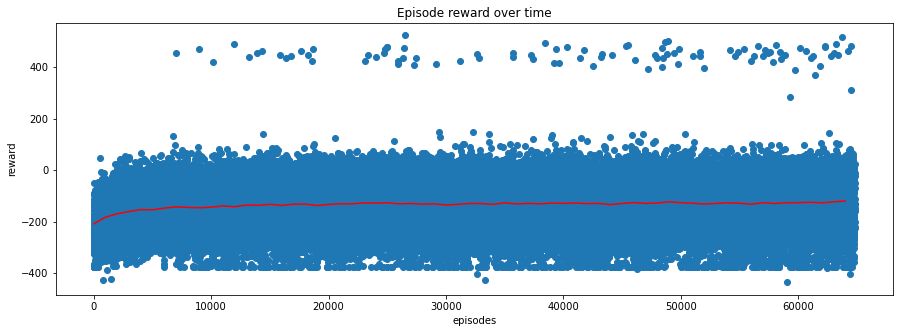

Maximum: 524.0
Average: -135.33268319779344
Moving Average (simple): {0: -209.04255744255744, 1000: -182.78821178821178, 2000: -169.84695304695305, 3000: -161.0901098901099, 4000: -153.65114885114886, 5000: -154.7868131868132, 6000: -147.6025974025974, 7000: -143.1002997002997, 8000: -145.05534465534464, 9000: -146.4201798201798, 10000: -144.26533466533465, 11000: -139.2055944055944, 12000: -142.34045954045953, 13000: -136.27632367632367, 14000: -136.77962037962038, 15000: -132.86033966033966, 16000: -137.586013986014, 17000: -132.48971028971027, 18000: -131.9216783216783, 19000: -137.74985014985015, 20000: -133.5894105894106, 21000: -131.06433566433566, 22000: -131.23536463536462, 23000: -127.34565434565434, 24000: -128.23216783216782, 25000: -126.98201798201798, 26000: -131.1034965034965, 27000: -129.7074925074925, 28000: -132.35424575424574, 29000: -131.32467532467533, 30000: -135.55904095904094, 31000: -133.13866133866134, 32000: -129.81778221778222, 33000: -129.81678321678322, 340

In [5]:
plot(episode_reward, "Episode reward over time", "episodes", "reward")

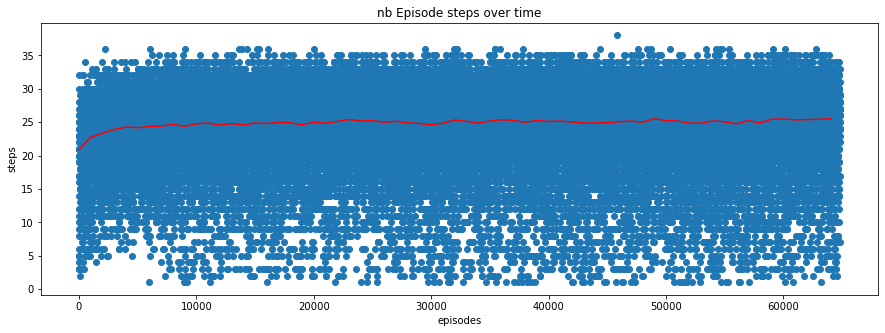

Maximum: 38
Average: 24.83825821284738
Moving Average (simple): {0: 20.86813186813187, 1000: 22.748251748251747, 2000: 23.324675324675326, 3000: 23.902097902097903, 4000: 24.266733266733265, 5000: 24.16883116883117, 6000: 24.347652347652346, 7000: 24.417582417582416, 8000: 24.677322677322678, 9000: 24.38161838161838, 10000: 24.747252747252748, 11000: 24.865134865134866, 12000: 24.565434565434565, 13000: 24.773226773226774, 14000: 24.577422577422578, 15000: 24.87012987012987, 16000: 24.791208791208792, 17000: 24.963036963036963, 18000: 24.907092907092906, 19000: 24.5994005994006, 20000: 24.995004995004994, 21000: 24.853146853146853, 22000: 25.111888111888113, 23000: 25.397602397602398, 24000: 25.186813186813186, 25000: 25.207792207792206, 26000: 24.994005994005995, 27000: 25.136863136863138, 28000: 24.885114885114884, 29000: 24.802197802197803, 30000: 24.5974025974026, 31000: 24.846153846153847, 32000: 25.32867132867133, 33000: 25.127872127872127, 34000: 24.848151848151847, 35000: 25.17

In [6]:
plot(nb_episode_steps, "nb Episode steps over time", "episodes", "steps")

In [7]:
# plot(loss_filtered, "Loss over time", "episodes", "loss")

In [8]:
#plot(mae_filtered, "Mae over time", "episodes", "mae")

In [9]:
#plot(mean_q_filtered, "Mean Q over time", "episodes", "mean q")

In [10]:
#plot(duration, "Duration over time", "episodes", "duration")

In [11]:
#plot(accuracy, "accuracy over time", "accuracy", "steps")